## Photonic Cavity Classifier - Final Model

## Project D (Team 169)
## Characterization of Photonic Cavities images for Quantum Applications from Low Resolution optical Images

### Project Team Members:


*   Kabirsingh Karamjeetsingh Bhatia
*   Sai Rithvik Ayithapu
*   Rishab Anil Muzhangathu

<br />

<p>This project focuses on developing an algorithm to analyze low-resolution, nondestructive optical images of nanofabricated cavities, aiming to discern which cavities have been successfully fabricated and which have not. Nanofabricated photonic cavities are crucial for advancing technologies in quantum computing, communication, and sensing. However, the fabrication process can often fail due to various reasons, such as incorrect fabrication dosage, equipment malfunctions, or human errors. Traditionally, the success of cavity fabrication is verified through high-resolution scanning electron microscope (SEM) imaging. While effective, SEM imaging is labor-intensive and the electron scattering during the process can damage the cavities, rendering them unsuitable for quantum applications. The proposed algorithm will leverage a large database of thousands of cavities, for which the success of fabrication is already known, to identify successful cavities based on optical images, thereby avoiding the drawbacks associated with SEM imaging.</p>


<br />


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
%matplotlib inline

drive.mount('/content/drive')

Mounted at /content/drive


### 1. Load and Prepare Data

Currently our data consists of images which are segregated into two directories: cavity and not cavity. We need to perform the following steps:

1. First, we need to check the size of the images. If they are different we need to resize the images.
2. Convert the image data into NumPy arrays.
3. Pre-process the data.
4. Split it into train, validation and test dataset.

Now we will test if drive is mounted correctly and the image dataset can be retrieved successfully.

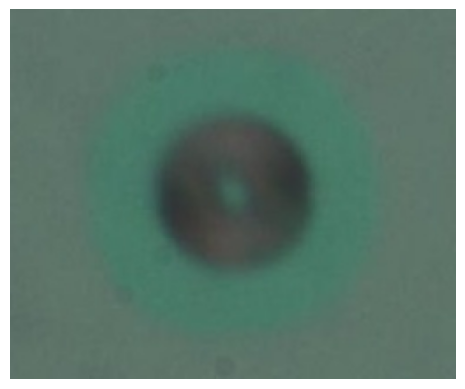

In [ ]:
img = Image.open('/content/drive/MyDrive/newDataset/cavity/class_0_cropped_BE_Beamer_Dima_1_6_bmp.rf.46c67cb5532f409f931fa681a68897c0.jpg_3.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()
print('')

In [ ]:
# checking the size of images
import os

def get_image_dimensions(directory):
    # Iterate over 10 files in the directory
    count = 0
    for filename in os.listdir(directory):
        if count == 10:
          break
        try:
            # Open the image file
            with Image.open(os.path.join(directory, filename)) as img:
                # Get dimensions (width x height)
                width, height = img.size
                print(f"{filename}: {height} x {width}")
                count += 1
        except Exception as e:
            print(f"Error processing {filename}: {e}")

dataset_directory = '/content/drive/MyDrive/newDataset/cavity'

get_image_dimensions(dataset_directory)

class_0_cropped_BE_NoBeamer_Dima_9_7_bmp.rf.162591570b9467114772304fc99084c8.jpg_6.jpg: 151 x 188
class_0_cropped_BE_NoBeamer_Dima_9_3_bmp.rf.ec4d676457888b6b40d4f98f3606bf70.jpg_9.jpg: 189 x 180
class_0_cropped_BE_NoBeamer_Dima_6_18_bmp.rf.8a37cda4d6f3e56f38f5f4d0222c8aed.jpg_12.jpg: 157 x 169
class_0_cropped_BE_NoBeamer_Dima_2_6_bmp.rf.356c60f5bc4e75a7f159a833bf397cd4.jpg_2.jpg: 189 x 178
class_0_cropped_BE_NoBeamer_Dima_3_8_bmp.rf.066fcaf18ac686dbfc392021608a5b2d.jpg_6.jpg: 170 x 162
class_0_cropped_BE_NoBeamer_Dima_9_12_bmp.rf.a3378a4aa7d99565c344d0d6c593e4da.jpg_9.jpg: 170 x 167
class_0_cropped_BE_NoBeamer_Dima_9_12_bmp.rf.a3378a4aa7d99565c344d0d6c593e4da.jpg_12.jpg: 176 x 179
class_0_cropped_BE_NoBeamer_Dima_6_20_bmp.rf.b626bde99d21c08ee2b9be9b0204bc84.jpg_10.jpg: 176 x 169
class_0_cropped_BE_NoBeamer_Dima_5_2_bmp.rf.4645b4969feabca8abb74d8da92c14e1.jpg_3.jpg: 184 x 193
class_0_cropped_BE_NoBeamer_Dima_9_11_bmp.rf.99eea54e43ef3bc2ca6f67d91c5be6ad.jpg_1.jpg: 162 x 179


In [ ]:
# Image sizes are different hence we need to resize them
data_directory = "/content/drive/MyDrive/newDataset"

In [ ]:
# Define Image Size
image_size = (64, 64)  # Resizing images to 64 X 64

# Initialize lists to store images and labels
dataset = []
labels = []

In [ ]:
# Populate the resized images and their labels into dataset and labels respectively
count = 0
prevCount = 0
# Iterate through each class folder
for class_folder in os.listdir(data_directory):
    class_path = os.path.join(data_directory, class_folder)
    if os.path.isdir(class_path):
        class_label = class_folder
        # Iterate through each image file in the class folder
        for image_file in os.listdir(class_path):
            count += 1
            image_path = os.path.join(class_path, image_file)
            if image_file.endswith('.jpg') or image_file.endswith('.png'):
                # Open and resize the image
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size)
                # convert the image data into numpy array
                image_data = np.array(image)
                # Append image and label to the lists
                dataset.append(image_data)
                labels.append(class_label)
                if count == prevCount + 1000:
                  print("1000 images processed")
                  prevCount = count

1000 images processed
1000 images processed
1000 images processed
1000 images processed
1000 images processed


### 2. Prepare your Final Model

We will normalize the data and split it into training, validation and testing. We will keep an 80-20 split between train and test dataset. Out of the testing dataset, 10% will be kept as validation dataset.

Our baseline model employs AveragePooling2D layers and BatchNormalization after each Conv2D layer, adding complexity to the network. While BatchNormalization aids in stabilizing and accelerating training by normalizing layer activations, it can sometimes introduce additional computational overhead. AveragePooling2D was used to smooth out features in the feature maps. With this model we managed to achieve an accuracy of 86%.

In contrast, our final CNN model simplifies the architecture by replacing AveragePooling2D with MaxPooling2D and omitting BatchNormalization layers. This streamlined design made the network easier to train and less prone to overfitting. MaxPooling2D helps in preserving important features, contributing to improved performance in image classification tasks. Additionally, the reduction in complexity has lead to faster training times and better generalization, making the final model more efficient.

In [ ]:
from keras.activations import sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#'dataset' is a list of numpy arrays (our resized images)
# and 'labels' is a list of string labels corresponding to each image

# Encode string labels to integers
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

# Convert integer labels to one-hot encoded labels
encoded_labels = to_categorical(integer_encoded)

# Normalize image data to 0-1 range
X = np.array(dataset) / 255.0
y = encoded_labels

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model with improved performance
model_improved = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_improved.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_improved.fit(X_train, y_train, epochs=7, validation_split=0.1, batch_size=32)

Epoch 1/7
122/122 [==============================] - 23s 177ms/step - loss: 0.6849 - accuracy: 0.5503 - val_loss: 0.6256 - val_accuracy: 0.6450
Epoch 2/7
122/122 [==============================] - 33s 273ms/step - loss: 0.5576 - accuracy: 0.6916 - val_loss: 0.4035 - val_accuracy: 0.8399
Epoch 3/7
122/122 [==============================] - 28s 225ms/step - loss: 0.4037 - accuracy: 0.8094 - val_loss: 0.2289 - val_accuracy: 0.9443
Epoch 4/7
122/122 [==============================] - 21s 172ms/step - loss: 0.3261 - accuracy: 0.8345 - val_loss: 0.2146 - val_accuracy: 0.9466
Epoch 5/7
122/122 [==============================] - 25s 205ms/step - loss: 0.2975 - accuracy: 0.8417 - val_loss: 0.2206 - val_accuracy: 0.9490
Epoch 6/7
122/122 [==============================] - 25s 202ms/step - loss: 0.3068 - accuracy: 0.8809 - val_loss: 0.2377 - val_accuracy: 0.9234
Epoch 7/7
122/122 [==============================] - 29s 241ms/step - loss: 0.2692 - accuracy: 0.9149 - val_loss: 0.2095 - val_accuracy:

### 3. Model Performance

In [ ]:
train_loss, train_acc = model_improved.evaluate(X_train, y_train, verbose=2)
print('\nTrain accuracy:', train_acc)

135/135 - 8s - loss: 0.1763 - accuracy: 0.9529 - 8s/epoch - 59ms/step

Train accuracy: 0.9528893232345581


In [ ]:
# Evaluate the model
test_loss, test_acc = model_improved.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

34/34 - 2s - loss: 0.1672 - accuracy: 0.9583 - 2s/epoch - 55ms/step

Test accuracy: 0.9582560062408447


34/34 [==============================] - 3s 73ms/step


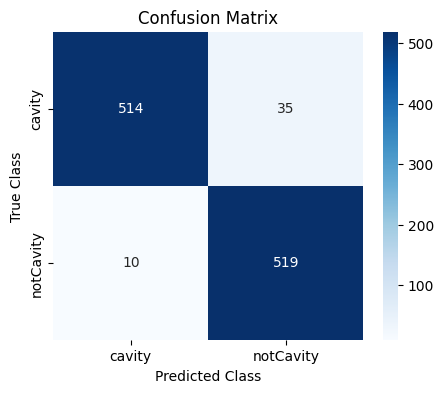

              precision    recall  f1-score   support

      cavity       0.98      0.94      0.96       549
   notCavity       0.94      0.98      0.96       529

    accuracy                           0.96      1078
   macro avg       0.96      0.96      0.96      1078
weighted avg       0.96      0.96      0.96      1078



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for the test set
y_pred = model_improved.predict(X_test)
# Convert predictions and true values to class indexes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Print precision, recall, and F1-score
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

The precision recall and f1-score of the baseline model is as follows

               precision    recall  f1-score   support

    cavity       0.80      0.97      0.88       549
    notCavity    0.96      0.75      0.85       529

    accuracy                         0.86      1078
    macro avg    0.88      0.86      0.86      1078
    weighted avg 0.88      0.86      0.86      1078

We can see that the final model performs well on both classes while the baseline does not deliver consistent performance on both classes.